In [75]:
from cleaning_module import clean_translate_reviews, clean_water_quality, clean_weather
from analysis_module import calculate_amenity_scores, compute_sentiment_scores
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime
import math
import random
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

**Reviews text cleaning and translate**

In [2]:
'''
input_file = 'row_data/reviews/reviews.csv'
urls_file = 'row_data/reviews/urls.csv'
output_file = 'processed_data/reviews/reviews_cleaned_translated.csv'
deepl_api_key = '631651fd-82bc-eca9-21cc-4861fe0a7a8f:fx' # From Xiao

clean_translate_reviews(input_file, urls_file, output_file, deepl_api_key)
'''

# Will need 1h to run, do not run again unless necessary

c:\Users\kalei\OneDrive\桌面\gps\Urban\fianl_data_analysis\cleanmodule.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('NA', inplace=True)


Cleaned data saved to processed_data/reviews/reviews_cleaned.csv


In [20]:
reviews = pd.read_csv('processed_data/reviews/reviews_cleaned_translated.csv').dropna(subset=['Translated_Review'])

print(len(reviews))
reviews.head()

3547


,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,...,review_questions_Kid-friendliness,review_questions_Dietary restrictions,review_questions_Parking space,review_questions_Parking options,review_questions_Parking,Location_Unique,Status,Lat,Long,Translated_Review
2,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChZDSUhNMG9nS0VJQ0FnSURaOTRXNUNREAE,CAESBkVnSUlBdw==,...,NaN,NaN,NaN,NaN,NaN,Gaasperplas,official,52.306924,4.986444,"Beautiful park, very quiet"
3,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChdDSUhNMG9nS0VJQ0FnSUNabDRxZHp3RRAB,CAESBkVnSUlCQQ==,...,NaN,NaN,NaN,NaN,NaN,Gaasperplas,official,52.306924,4.986444,Polecam
6,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChZDSUhNMG9nS0VJQ0FnSUNadHBxZEJBEAE,CAESBkVnSUlCdw==,...,NaN,NaN,NaN,NaN,NaN,Gaasperplas,official,52.306924,4.986444,Beautiful area of Amsterdam. Near Krainnest an...
8,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChZDSUhNMG9nS0VJQ0FnSURwM292Y1JBEAE,CAESBkVnSUlDUQ==,...,NaN,NaN,NaN,NaN,NaN,Gaasperplas,official,52.306924,4.986444,Lovely Lake
10,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChdDSUhNMG9nS0VJQ0FnSUNwcFotMTNRRRAB,CAESBkVnSUlDdw==,...,NaN,NaN,NaN,NaN,NaN,Gaasperplas,official,52.306924,4.986444,"Home, the lake is full of beaches, perfect for..."


**Water quality data cleaning**

In [13]:
input_file = 'row_data/water_quality/Amsterdam2007-2023_utf-8.csv'
output_file = 'processed_data/water_quality/water_quality_cleaned.csv'

clean_water_quality(input_file, output_file)

c:\Users\kalei\OneDrive\桌面\Repo_win\Urban\fianl_data_analysis\cleaning_module.py:104: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file_path)


Cleaned data saved to processed_data/water_quality/water_quality_cleaned.csv


In [11]:
water_quality = pd.read_csv('processed_data/water_quality/water_quality_cleaned.csv')

water_quality.head()

C:\Users\kalei\AppData\Local\Temp\ipykernel_40444\1820173234.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  water_quality = pd.read_csv('processed_data/water_quality/water_quality_cleaned.csv')


,locatiecode,locatie omschrijving,locatie x,locatie y,locatie z,compartiment,datum,fewsparameter,fewsparametercode,fewsparameternaam,...,fewsparameterparameterfractie,limietsymbool,meetwaarde,eenheid,waardebewerkingsmethode,afronding,opmerkingmeting,date,lat,lon
0,BGP008,Papelaan,130712,481615,NaN,OW,3-1-2007 08:15,O2_mg/l,O2,Zuurstof (mg/l),...,NaN,NaN,6.4,mg/l,MET,Ja,NaN,2007-01-03,52.321946,5.030963
1,BGP008,Papelaan,130712,481615,NaN,OW,3-1-2007 08:15,O2_%,O2,Zuurstofverzadigingspercentage,...,NaN,NaN,49.0,%,MET,Ja,NaN,2007-01-03,52.321946,5.030963
2,BGP008,Papelaan,130712,481615,NaN,OW,3-1-2007 08:15,T_oC,T,Temperatuur (oC),...,NaN,NaN,4.5,oC,MET,Ja,NaN,2007-01-03,52.321946,5.030963
3,BGP008,Papelaan,130712,481615,NaN,OW,3-1-2007 08:15,ZICHT_m,ZICHT,Doorzicht (m),...,NaN,>,0.2,m,MET,Ja,NaN,2007-01-03,52.321946,5.030963
4,BGP010,In bak achter benzinestation aflaat stedelijk ...,131455,480719,NaN,OW,3-1-2007 08:30,O2_mg/l,O2,Zuurstof (mg/l),...,NaN,NaN,3.1,mg/l,MET,Ja,NaN,2007-01-03,52.313926,5.041924


In [12]:
unique_indicator_types = water_quality['fewsparameter'].unique()
unique_indicator_count = len(unique_indicator_types)
unique_indicator_types_list = unique_indicator_types.tolist()

unique_indicator_count, unique_indicator_types_list

(8,
 ['O2_mg/l',
  'O2_%',
  'T_oC',
  'ZICHT_m',
  'INTTNLETRCCN_nKVE/dl',
  'E_COLI_nKVE/dl',
  'BADGT_n',
  'CHLFa_ug/l_blauwalg'])

**Weather data cleaning**

In [12]:
input_file = 'row_data/weather/schiphol_KNMI_weather_data_2007_2023.txt'
output_file = 'processed_data/weather/weather_cleaned.csv'

clean_weather(input_file, output_file)

Cleaned data saved to processed_data/weather/weather_cleaned.csv


In [3]:
weather = pd.read_csv('processed_data/weather/weather_cleaned.csv')

weather.head()

'''
FG: Etmaalgemiddelde windsnelheid (in 0.1 m/s) / Daily mean windspeed (in 0.1 m/s)
TG: Etmaalgemiddelde temperatuur (in 0.1 graden Celsius) / Daily mean temperature in (0.1 degrees Celsius)
SQ: Zonneschijnduur (in 0.1 uur) berekend uit de globale straling (-1 voor <0.05 uur) / Sunshine duration (in 0.1 hour) calculated from global 
DR: Duur van de neerslag (in 0.1 uur) / Precipitation duration (in 0.1 hour)
RH: Etmaalsom van de neerslag (in 0.1 mm) (-1 voor <0.05 mm) / Daily precipitation amount (in 0.1 mm) (-1 for <0.05 mm)
PG: Etmaalgemiddelde luchtdruk herleid tot zeeniveau (in 0.1 hPa) berekend uit 24 uurwaarden / Daily mean sea level pressure (in 0.1 hPa) 
UG: Etmaalgemiddelde relatieve vochtigheid (in procenten) / Daily mean relative atmospheric humidity (in percents)
EV24: Referentiegewasverdamping (Makkink) (in 0.1 mm) / Potential evapotranspiration (Makkink) (in 0.1 mm)
'''

,date,FG,TG,SQ,DR,RH,PG,UG,EV24
0,2007-01-02,7.0,6.3,1.3,4.5,5.6,1017.9,83,0.2
1,2007-01-03,7.3,7.1,0.3,2.1,0.4,1021.4,88,0.1
2,2007-01-04,10.7,9.6,0.0,1.1,0.8,1007.7,81,0.2
3,2007-01-05,6.7,9.4,0.0,2.3,1.2,1015.8,87,0.1
4,2007-01-06,4.1,7.3,0.3,8.5,8.8,1013.7,92,0.2


**Convert OSM data to amenities score**

In [2]:
input_file = 'row_data/reviews/urls.csv'
output_file = 'processed_data/amenities_score/amenities_score.csv'
data_folder = 'row_data/OSM/output_OSM_data'

calculate_amenity_scores(input_file, output_file, data_folder)

Amenity scores saved to: processed_data/amenities_score/amenities_score.csv


In [3]:
amenities_score = pd.read_csv('processed_data/amenities_score/amenities_score.csv')

amenities_score.head()

,Location,Amenities_Score,Normalized_Amenities_Score
0,Gaasperplas,5,0.36
1,Gaasperplas strand,4,0.29
2,Playground Gaasperplaspark,7,0.50
3,Waterspeelplaats Gaasperpark,7,0.50
4,Park de Oeverlanden,4,0.29


**Get sentiment score from reviews**

In [2]:
input_file = 'processed_data/reviews/reviews_cleaned_translated.csv'
output_file = 'processed_data/sentiment_score/reviews_sentiment_score.csv'

compute_sentiment_scores(input_file, output_file)

Sentiment scores computed and saved to processed_data/sentiment_score/reviews_sentiment_score.csv


In [22]:
sentiment_score = pd.read_csv('processed_data/sentiment_score/reviews_sentiment_score.csv').dropna(subset=['Sentiment_Score'])
sentiment_score = sentiment_score[['name', 'Location_Unique', 'review_datetime_utc', 'Translated_Review', 'Sentiment_Score']]

sentiment_score.head()


,name,Location_Unique,review_datetime_utc,Translated_Review,Sentiment_Score
2,Gaasperplas,Gaasperplas,2023-10-08,"Beautiful park, very quiet",0.5994
3,Gaasperplas,Gaasperplas,2023-09-20,Polecam,0.0000
6,Gaasperplas,Gaasperplas,2023-09-10,Beautiful area of Amsterdam. Near Krainnest an...,0.7717
8,Gaasperplas,Gaasperplas,2023-08-22,Lovely Lake,0.5859
10,Gaasperplas,Gaasperplas,2023-08-07,"Home, the lake is full of beaches, perfect for...",0.5719


**Datasets linkage**

Link sentiment score with water quality

In [2]:
'''
reviews_sentiment_score_df = pd.read_csv(r'processed_data/sentiment_score/reviews_sentiment_score.csv')
water_quality_df = pd.read_csv('processed_data/water_quality/water_quality_cleaned.csv')

# Get unique items from 'fewsparameter'
unique_parameters = water_quality_df['fewsparameter'].unique()

# Initialize new columns in the reviews sentiment score dataframe
for param in unique_parameters:
    reviews_sentiment_score_df[param] = None

# Haversine_distance function
def haversine_distance(lat1, lon1, lat2, lon2):
    """
    Calculate the Haversine distance between two points on the earth.
    
    :param lat1: Latitude of the first point.
    :param lon1: Longitude of the first point.
    :param lat2: Latitude of the second point.
    :param lon2: Longitude of the second point.
    :return: Distance in kilometers.
    """
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert latitude and longitude from degrees to radians
    lat1_rad = math.radians(lat1)
    lon1_rad = math.radians(lon1)
    lat2_rad = math.radians(lat2)
    lon2_rad = math.radians(lon2)

    # Difference in coordinates
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad

    # Haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    return R * c

# Function to merge data
def merge_data(reviews_df, water_quality_df, radius=1):
    total_reviews = len(reviews_df)
    last_printed_percent = 0
    
    for index1, row1 in reviews_df.iterrows():
        closest_distance = float('inf')
        closest_water_quality = None

        for index2, row2 in water_quality_df.iterrows():
            if row1['review_datetime_utc'] == row2['date']:
                distance = haversine_distance(row1['Lat'], row1['Long'], row2['lat'], row2['lon'])
            for param in unique_parameters:
                matching_param_value = water_quality_df.loc[
                    (water_quality_df['date'] == closest_water_quality['date']) &
                    (water_quality_df['lat'] == closest_water_quality['lat']) &
                    (water_quality_df['lon'] == closest_water_quality['lon']) &
                    (water_quality_df['fewsparameter'] == param), 'meetwaarde'
                ]
                if not matching_param_value.empty:
                    reviews_df.at[index1, param] = matching_param_value.iloc[0]    if distance <= radius and distance < closest_distance:
                    closest_distance = distance
                    closest_water_quality = row2

        if closest_water_quality is not None:
            

        # Overall review progress update
        percent_complete = (index1 + 1) / total_reviews * 100

        if percent_complete - last_printed_percent >= 0.5:
            reviews_left = total_reviews - (index1 + 1)
            print(f"Review progress: Processed {index1 + 1}/{total_reviews} reviews. "
                  f"{reviews_left} reviews left ({percent_complete:.2f}% complete).")
            last_printed_percent = percent_complete

    return reviews_df

merged_df = merge_data(reviews_sentiment_score_df, water_quality_df)

merged_df.to_csv('merged_data/water_sentiment.csv', index=False)
'''

# Will need 3h to run, do not run again unless necessary

/var/folders/l2/6k2cs13d16xfb7mrzcmwrcv40000gn/T/ipykernel_29770/4225307395.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  water_quality_df = pd.read_csv('processed_data/water_quality/water_quality_cleaned.csv')


Review progress: Processed 42/8286 reviews. 8244 reviews left (0.51% complete).
Review progress: Processed 84/8286 reviews. 8202 reviews left (1.01% complete).
Review progress: Processed 126/8286 reviews. 8160 reviews left (1.52% complete).
Review progress: Processed 168/8286 reviews. 8118 reviews left (2.03% complete).
Review progress: Processed 210/8286 reviews. 8076 reviews left (2.53% complete).
Review progress: Processed 252/8286 reviews. 8034 reviews left (3.04% complete).
Review progress: Processed 294/8286 reviews. 7992 reviews left (3.55% complete).
Review progress: Processed 336/8286 reviews. 7950 reviews left (4.06% complete).
Review progress: Processed 378/8286 reviews. 7908 reviews left (4.56% complete).
Review progress: Processed 420/8286 reviews. 7866 reviews left (5.07% complete).
Review progress: Processed 462/8286 reviews. 7824 reviews left (5.58% complete).
Review progress: Processed 504/8286 reviews. 7782 reviews left (6.08% complete).
Review progress: Processed 546

In [6]:
water_sentiment = pd.read_csv('merged_data/water_sentiment.csv')

e_coli = water_sentiment.dropna(subset=['E_COLI_nKVE/dl'])

print(len(e_coli))
e_coli.head()

266


C:\Users\kalei\AppData\Local\Temp\ipykernel_44524\533866176.py:1: DtypeWarning: Columns (19,21,40,41,43,49) have mixed types. Specify dtype option on import or set low_memory=False.
  water_sentiment = pd.read_csv('merged_data/water_sentiment.csv')


,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,...,Cleaned_Review,Sentiment_Score,O2_mg/l,O2_%,T_oC,ZICHT_m,INTTNLETRCCN_nKVE/dl,E_COLI_nKVE/dl,BADGT_n,CHLFa_ug/l_blauwalg
3,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChdDSUhNMG9nS0VJQ0FnSUNabDRxZHp3RRAB,CAESBkVnSUlCQQ==,...,polecam,0.0000,NaN,NaN,18.4,1.0,390.0,440.0,0.0,NaN
8,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChZDSUhNMG9nS0VJQ0FnSURwM292Y1JBEAE,CAESBkVnSUlDUQ==,...,lovely lake,0.5859,NaN,NaN,22.5,1.0,20.0,670.0,7.0,NaN
9,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChdDSUhNMG9nS0VJQ0FnSUNjMzdTdnJ3RRAB,CAESBkVnSUlDZw==,...,NaN,NaN,NaN,NaN,22.5,1.0,20.0,670.0,7.0,NaN
10,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChdDSUhNMG9nS0VJQ0FnSUNwcFotMTNRRRAB,CAESBkVnSUlDdw==,...,"home, the lake is full of beaches, perfect for...",0.5719,NaN,NaN,18.0,1.0,60.0,350.0,0.0,2.0
72,ChIJNwlWvV0MxkcRW5cfLBoYztg,Gaasperplas,0x47c60c5dbd560937:0xd8ce181a2c1f975b,ChIJNwlWvV0MxkcRW5cfLBoYztg,https://www.google.com/maps/place/Gaasperplas/...,https://search.google.com/local/reviews?placei...,193,4.6,ChZDSUhNMG9nS0VJQ0FnSURLN2NPT0FREAE,CAESBkVnSUlTUQ==,...,NaN,NaN,NaN,NaN,13.6,0.3,410.0,140.0,0.0,NaN


**Merge weather and amenities scores with water quality and sentiment**

In [4]:
merged_water_sentiment_df = pd.read_csv('merged_data\water_sentiment.csv')
weather_df = pd.read_csv('processed_data\weather\weather_cleaned.csv')
amenities_score_df = pd.read_csv(r'processed_data\amenities_score\amenities_score.csv')

total_reviews = len(merged_water_sentiment_df)
percent_interval = 10
next_percent_threshold = percent_interval

# Merge with Weather Data
for index, row in merged_water_sentiment_df.iterrows():
    matching_weather = weather_df[weather_df['date'] == row['review_datetime_utc']]
    if not matching_weather.empty:
        for col in weather_df.columns:
            if col != 'date':
                merged_water_sentiment_df.at[index, col] = matching_weather.iloc[0][col]

    # Progress update
    percent_complete = (index + 1) / total_reviews * 100
    if percent_complete >= next_percent_threshold:
        reviews_left = total_reviews - (index + 1)
        print(f"Weather merging progress: Processed {index + 1}/{total_reviews} reviews. {reviews_left} reviews left ({percent_complete:.2f}% complete).")
        next_percent_threshold += percent_interval
        
next_percent_threshold = percent_interval

# Merge with Amenities Score Data
for index, row in merged_water_sentiment_df.iterrows():
    matching_amenity = amenities_score_df[amenities_score_df['Location'] == row['name']]
    if not matching_amenity.empty:
        for col in amenities_score_df.columns:
            if col != 'Location':
                merged_water_sentiment_df.at[index, col] = matching_amenity.iloc[0][col]

    # Progress update
    percent_complete = (index + 1) / total_reviews * 100
    if percent_complete >= next_percent_threshold:
        reviews_left = total_reviews - (index + 1)
        print(f"Amenities score merging progress: Processed {index + 1}/{total_reviews} reviews. {reviews_left} reviews left ({percent_complete:.2f}% complete).")
        next_percent_threshold += percent_interval

merged_water_sentiment_df.to_csv('merged_data\merged_all.csv', index=False)

C:\Users\kalei\AppData\Local\Temp\ipykernel_16428\2553892588.py:1: DtypeWarning: Columns (19,21,40,41,43,49) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_water_sentiment_df = pd.read_csv('merged_data\water_sentiment.csv')


Weather merging progress: Processed 829/8286 reviews. 7457 reviews left (10.00% complete).
Weather merging progress: Processed 1658/8286 reviews. 6628 reviews left (20.01% complete).
Weather merging progress: Processed 2486/8286 reviews. 5800 reviews left (30.00% complete).
Weather merging progress: Processed 3315/8286 reviews. 4971 reviews left (40.01% complete).
Weather merging progress: Processed 4143/8286 reviews. 4143 reviews left (50.00% complete).
Weather merging progress: Processed 4972/8286 reviews. 3314 reviews left (60.00% complete).
Weather merging progress: Processed 5801/8286 reviews. 2485 reviews left (70.01% complete).
Weather merging progress: Processed 6629/8286 reviews. 1657 reviews left (80.00% complete).
Weather merging progress: Processed 7458/8286 reviews. 828 reviews left (90.01% complete).
Weather merging progress: Processed 8286/8286 reviews. 0 reviews left (100.00% complete).
Amenities score merging progress: Processed 829/8286 reviews. 7457 reviews left (10.

**Data preparation for machine learning**

In [65]:
merged_all = pd.read_csv('merged_data\merged_all.csv').dropna(subset=['Translated_Review'])

columns_to_drop = ['query', 'google_id', 'place_id', 'location_link', 'reviews_link', 'rating', 
                   'review_id', 'review_pagination_id', 'author_link', 'author_title', 'author_id',
                   'author_image', 'review_text', 'review_img_url', 'review_img_urls', 'review_questions',
                   'review_photo_ids', 'owner_answer', 'owner_answer_timestamp', 
                   'owner_answer_timestamp_datetime_utc', 'review_link', 'review_rating', 'review_timestamp', 
                   'review_likes', 'reviews_id', 'reviews_per_score_1', 'reviews_per_score_2', 
                   'reviews_per_score_3', 'reviews_per_score_4', 'reviews_per_score_5', 'reviews_per_score', 
                   'review_questions_Playground', 'review_questions_Restrooms', 'review_questions_Dog-friendliness', 
                   'review_questions_Picnic area', 'review_questions_None', 'review_questions_Features', 
                   'review_questions_Meal type', 'review_questions_Price per person', 'review_questions_Food', 
                   'review_questions_Service', 'review_questions_Atmosphere', 'review_questions_Recommended dishes', 
                   'review_questions_Vegetarian options', 'review_questions_Kid-friendliness', 'review_questions_Dietary restrictions',
                   'review_questions_Parking space', 'review_questions_Parking options', 'review_questions_Parking', 'Cleaned_Review', 
                   'BADGT_n', 'PG', 'UG', 'EV24']

merged_all_cleaned = merged_all.drop(columns=columns_to_drop)

merged_all_cleaned.to_csv('merged_data\merged_all_cleaned.csv', index=False)

C:\Users\kalei\AppData\Local\Temp\ipykernel_46360\2595295055.py:1: DtypeWarning: Columns (19,21,40,41,43,49) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_all = pd.read_csv('merged_data\merged_all.csv').dropna(subset=['Translated_Review'])


Impute missing values

In [15]:
data = pd.read_csv('merged_data/merged_all_cleaned.csv')

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

categorical_cols = categorical_cols.drop('name')

# Impute NA in numeric columns
iterative_imputer = IterativeImputer(random_state=0)
numeric_data_for_imputation = data[numeric_cols]
imputed_numeric_data = iterative_imputer.fit_transform(numeric_data_for_imputation)

imputed_numeric_df = pd.DataFrame(imputed_numeric_data, columns=numeric_cols)

# Fill missing values with a placeholder and convert categories to numbers
data[categorical_cols] = data[categorical_cols].fillna('missing')
for col in categorical_cols:
    data[col] = OrdinalEncoder().fit_transform(data[[col]])

# Combine the data back together
final_imputed_df = pd.concat([imputed_numeric_df, data[categorical_cols], data['name'].reset_index(drop=True)], axis=1)

final_imputed_df.to_csv('imputed_data/clustering_imputed_data.csv', index=False)

Clustering

/Users/aoyamaxx/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aoyamaxx/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aoyamaxx/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aoyamaxx/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureW

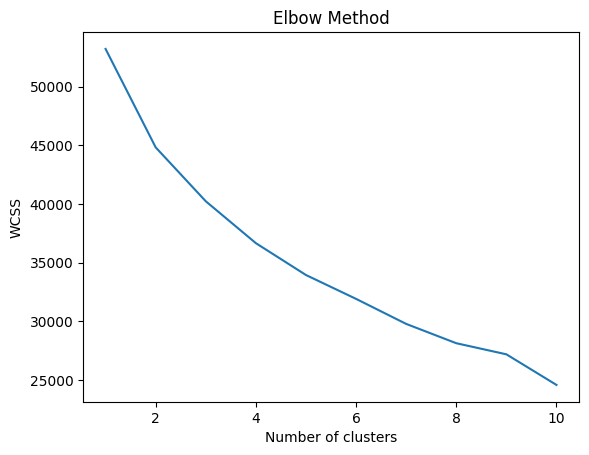

/Users/aoyamaxx/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


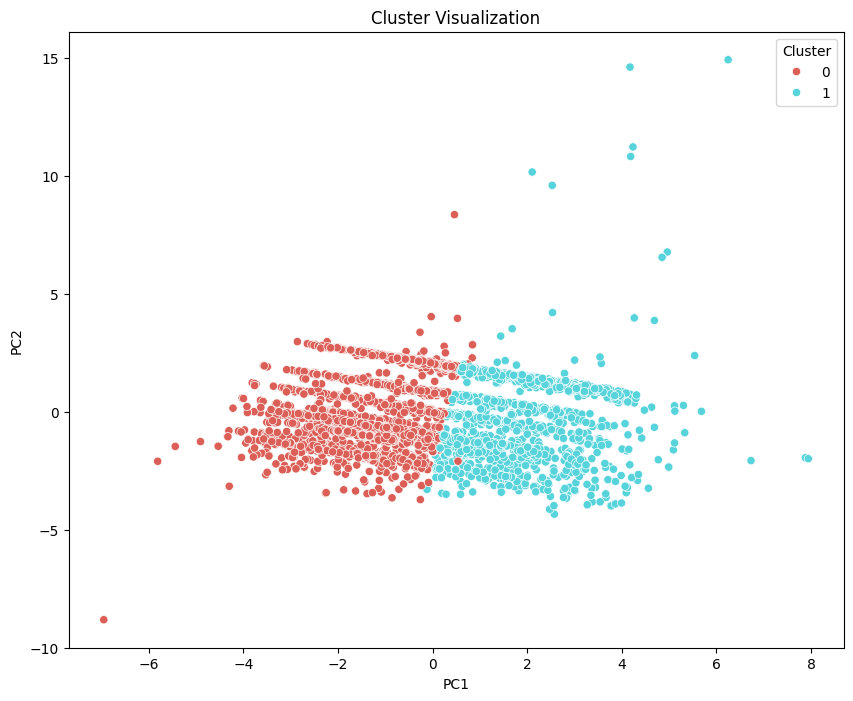

             reviews        Lat      Long  Sentiment_Score   O2_mg/l  \
Cluster                                                                
0        1068.633570  52.359242  4.879684         0.537029  6.541241   
1        1282.763966  52.366320  4.877888         0.552137  8.125947   

              O2_%       T_oC   ZICHT_m  INTTNLETRCCN_nKVE/dl  E_COLI_nKVE/dl  \
Cluster                                                                         
0        71.262055  19.265527  1.198791            215.231656      448.879021   
1        72.944248  11.352592  1.264297            242.616496      489.671577   

         ...         TG        SQ        DR        RH  Amenities_Score  \
Cluster  ...                                                             
0        ...  18.313617  9.127943  0.417069  0.947943         3.623168   
1        ...   8.987713  3.685371  2.750944  4.070852         3.495810   

         Normalized_Amenities_Score  review_datetime_utc  Location_Unique  \
Cluster     

In [17]:
data = pd.read_csv('imputed_data/clustering_imputed_data.csv')

# Exclude irrelevant features
features = data.drop(['Sentiment_Score', 'Lat', 'Long', 'Amenities_Score', 'name', 'review_datetime_utc', 'Location_Unique', 'Translated_Review'], axis=1)
target = data['Sentiment_Score']

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the number of k based on the elbow method
k = 2
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(features_scaled)

clusters = kmeans.labels_

# Assign cluster labels to the data
data['Cluster'] = clusters

# Use PCA to reduce the dimensionality for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)

# Add the PCA components for visualization
data['PC1'] = principal_components[:, 0]
data['PC2'] = principal_components[:, 1]

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=data, palette=sns.color_palette('hls', n_colors=k))
plt.title('Cluster Visualization')
plt.show()

numeric_cols_for_analysis = data.select_dtypes(include=['float64', 'int64']).columns
numeric_cols_for_analysis = numeric_cols_for_analysis.drop(['PC1', 'PC2'])  # Drop the PCA components from analysis

cluster_analysis = data.groupby('Cluster')[numeric_cols_for_analysis].mean()

print(cluster_analysis)

for cluster in sorted(data['Cluster'].unique()):
    print(f"\nCluster {cluster}:")
    print(data.loc[data['Cluster'] == cluster, 'name'])
    
data[['name', 'Cluster', 'PC1', 'PC2']].to_csv('clustering_results_with_pca.csv', index=False)

# cluster_analysis.to_csv('cluster_analysis_summary.csv', index=True)

Random Forest

In [88]:
data = pd.read_csv('merged_data/merged_all_cleaned.csv')

data['Status'] = data['Status'].apply(lambda x: 1 if x == 'official' else 0)

iterative_imputer = IterativeImputer(max_iter=10, random_state=0)

data_numeric = data.drop(columns=['Status', 'reviews', 'Lat', 'Long', 'Amenities_Score', 'name', 'review_datetime_utc', 'Location_Unique', 'Translated_Review'])
data_imputed = pd.DataFrame(iterative_imputer.fit_transform(data_numeric), columns=data_numeric.columns)

data_imputed['Status'] = data['Status'].reset_index(drop=True)

# Calculating the number of imputed values
total_values = data_numeric.size
total_missing = data_numeric.isna().sum().sum()
total_imputed = total_missing
percentage_imputed = (total_imputed / total_values) * 100

print(f"Percentage of imputed data for the whole dataset: {percentage_imputed:.2f}%")

# Calculate the percentage of missing values in each column
percentage_missing_by_column = data_numeric.isna().mean() * 100
sorted_percentage_missing = percentage_missing_by_column.sort_values(ascending=False)

print("Percentage of Missing (Imputed) Data by Column:")
for column, percentage in sorted_percentage_missing.items():
    print(f"{column}: {percentage:.2f}%")
    
print(data_imputed.columns)

data_imputed.to_csv('imputed_data/random_forest_imputed_data.csv', index=False)

data = data_imputed

Percentage of imputed data for the whole dataset: 47.41%
Percentage of Missing (Imputed) Data by Column:
INTTNLETRCCN_nKVE/dl: 96.39%
E_COLI_nKVE/dl: 96.39%
CHLFa_ug/l_blauwalg: 96.22%
O2_mg/l: 94.90%
O2_%: 94.90%
ZICHT_m: 92.53%
T_oC: 92.25%
FG: 0.03%
TG: 0.03%
SQ: 0.03%
DR: 0.03%
RH: 0.03%
Sentiment_Score: 0.00%
Normalized_Amenities_Score: 0.00%
Index(['Sentiment_Score', 'O2_mg/l', 'O2_%', 'T_oC', 'ZICHT_m',
       'INTTNLETRCCN_nKVE/dl', 'E_COLI_nKVE/dl', 'CHLFa_ug/l_blauwalg', 'FG',
       'TG', 'SQ', 'DR', 'RH', 'Normalized_Amenities_Score', 'Status'],
      dtype='object')


/Users/aoyamaxx/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Mean MSE from 5-fold CV: 0.01793307630898237
Standard Deviation of MSE from 5-fold CV: 0.0031848594281035825
Number of training data points: 2837
Number of testing data points: 710
Mean Squared Error: 0.016979307885454927
Root Mean Squared Error: 0.13030467330627452
Mean Absolute Error: 0.0693228802816901
R-squared: 0.8740778199690281
E_COLI_nKVE/dl                0.637586
O2_mg/l                       0.059441
T_oC                          0.057680
INTTNLETRCCN_nKVE/dl          0.053934
FG                            0.045057
TG                            0.043296
SQ                            0.033173
ZICHT_m                       0.022161
CHLFa_ug/l_blauwalg           0.019402
O2_%                          0.013636
RH                            0.005234
DR                            0.004784
Normalized_Amenities_Score    0.003273
Status                        0.001342
dtype: float64


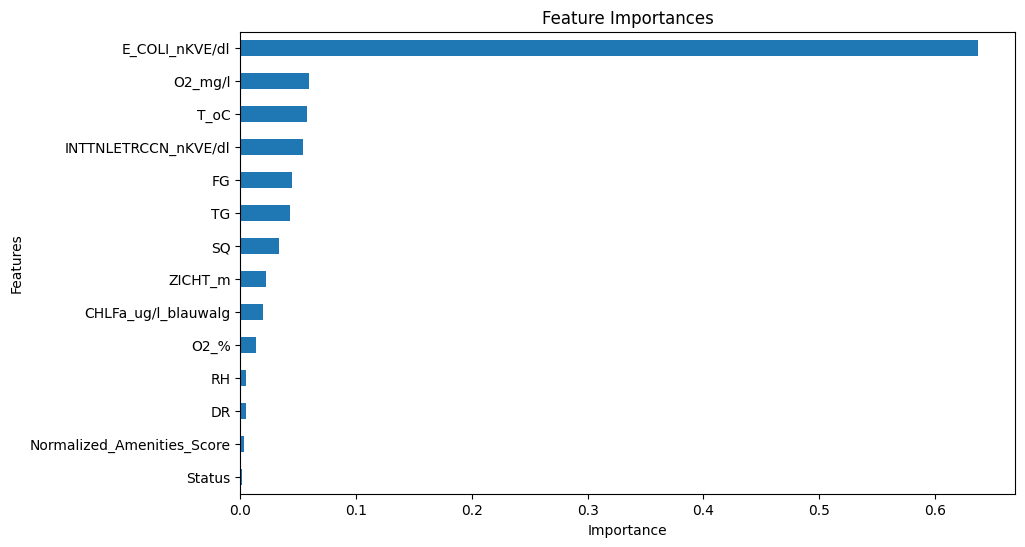

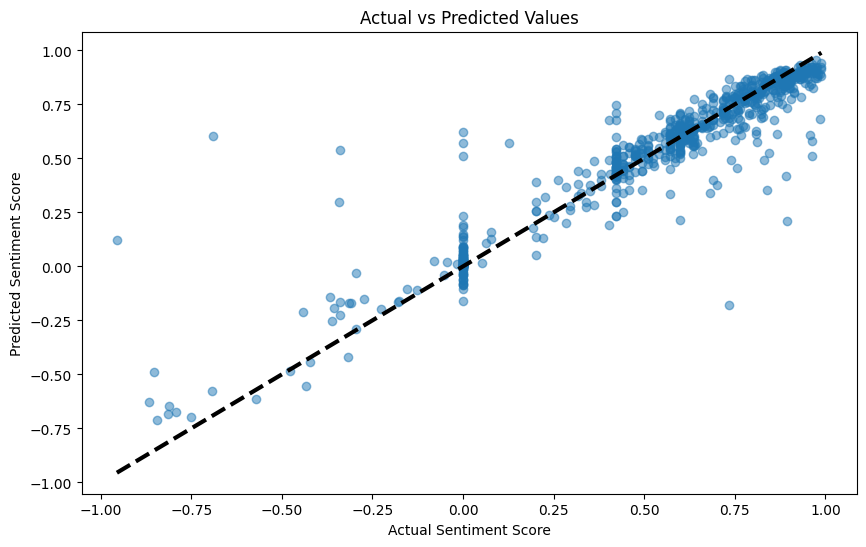

In [3]:
X = data.drop(['Sentiment_Score'], axis=1)
y = data['Sentiment_Score']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform K-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive values
mse_scores = -cv_scores

# Calculate mean and standard deviation of MSE
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f"Mean MSE from 5-fold CV: {mean_mse}")
print(f"Standard Deviation of MSE from 5-fold CV: {std_mse}")

# Fitting the model
rf_model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = rf_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Number of training data points: {len(X_train)}")
print(f"Number of testing data points: {len(X_test)}")

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))
feature_importances.sort_values(ascending=False).to_csv('feature_importances.csv')

# Feature importances
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Sentiment Score')
plt.ylabel('Predicted Sentiment Score')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

**Data linkage second try (by month)**

Convert sentiment score to monthly data and merge it with water quality

In [32]:
reviews_sentiment_score_df = pd.read_csv(r'processed_data/sentiment_score/reviews_sentiment_score.csv')
water_quality_df = pd.read_csv('processed_data/water_quality/water_quality_cleaned.csv')

reviews_sentiment_score_df = reviews_sentiment_score_df[['name', 'Location_Unique', 'review_datetime_utc', 'Lat', 'Long', 'Status', 'Sentiment_Score', 'review_rating']]

# Convert to year-month format
reviews_sentiment_score_df['review_datetime_utc'] = pd.to_datetime(reviews_sentiment_score_df['review_datetime_utc']).dt.to_period('M').dt.to_timestamp()

# Group by location and year-month, compute mean, median, and std
grouped_df = reviews_sentiment_score_df.groupby(['name', 'Location_Unique', 'Lat', 'Long', 'Status', 'review_datetime_utc']).agg(
    Sentiment_Score_mean=('Sentiment_Score', 'mean'),
    Sentiment_Score_median=('Sentiment_Score', 'median'),
    Sentiment_Score_std=('Sentiment_Score', 'std'),
    review_rating_mean=('review_rating', 'mean'),
    review_rating_median=('review_rating', 'median'),
    review_rating_std=('review_rating', 'std'),
    Sentiment_Score_count=('Sentiment_Score', 'count'),
    review_rating_count=('review_rating', 'count')
).reset_index()

# For solo data points, use the original score for mean and median, and set std as 0
grouped_df.loc[grouped_df['Sentiment_Score_count'] == 1, ['Sentiment_Score_mean', 'Sentiment_Score_median']] = grouped_df['Sentiment_Score_mean']
grouped_df.loc[grouped_df['Sentiment_Score_count'] == 1, 'Sentiment_Score_std'] = 0

grouped_df.loc[grouped_df['review_rating_count'] == 1, ['review_rating_mean', 'review_rating_median']] = grouped_df['review_rating_mean']
grouped_df.loc[grouped_df['review_rating_count'] == 1, 'review_rating_std'] = 0

grouped_df.sort_values(by=['name', 'review_datetime_utc'], ascending=[True, False], inplace=True)
grouped_df.drop(columns=['Sentiment_Score_count', 'review_rating_count'], inplace=True) 
grouped_df.to_csv('processed_data/sentiment_score/monthly_sentiment_scores.csv', index=False)

# Merging data
# Convert 'date' column to year-month format in water quality data
water_quality_df = water_quality_df[['date', 'lat', 'lon', 'fewsparameter', 'meetwaarde']]
water_quality_df['date'] = pd.to_datetime(water_quality_df['date']).dt.to_period('M').dt.to_timestamp()

# Haversine distance function
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius of the Earth in kilometers
    lat1_rad, lon1_rad, lat2_rad, lon2_rad = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2_rad - lat1_rad
    dlon = lon2_rad - lon1_rad
    a = math.sin(dlat / 2)**2 + math.cos(lat1_rad) * math.cos(lat2_rad) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

# Merge data function
def merge_data(reviews_df, water_quality_df, radius=1):
    total_reviews = len(reviews_df)
    last_printed_percent = 0
    
    # Initialize new columns for each water quality parameter
    unique_parameters = water_quality_df['fewsparameter'].unique()
    for param in unique_parameters:
        for metric in ['mean', 'median', 'std']:
            reviews_df[f'{param}_{metric}'] = None

    # Iterate over reviews data
    for index, review_row in reviews_df.iterrows():
        matching_water_data = water_quality_df[
            (water_quality_df['date'] == review_row['review_datetime_utc']) & 
            (water_quality_df['lat'].sub(review_row['Lat']).abs() <= 0.1) & 
            (water_quality_df['lon'].sub(review_row['Long']).abs() <= 0.1)
        ]

        # Filter based on Haversine distance
        matching_water_data = matching_water_data[matching_water_data.apply(lambda row: haversine_distance(review_row['Lat'], review_row['Long'], row['lat'], row['lon']) <= radius, axis=1)]

        # Process each water quality parameter
        for param in unique_parameters:
            # Check if matching_water_data is not empty and contains 'fewsparameter'
            if not matching_water_data.empty and 'fewsparameter' in matching_water_data.columns:
                param_data = matching_water_data[matching_water_data['fewsparameter'] == param]['meetwaarde']

                if param_data.empty:
                    # If no data for this parameter, set NaN for mean, median, and std
                    reviews_df.at[index, f'{param}_mean'] = np.NaN
                    reviews_df.at[index, f'{param}_median'] = np.NaN
                    reviews_df.at[index, f'{param}_std'] = np.NaN
                else:
                    # Aggregate water quality data
                    reviews_df.at[index, f'{param}_mean'] = param_data.mean()
                    reviews_df.at[index, f'{param}_median'] = param_data.median()
                    reviews_df.at[index, f'{param}_std'] = param_data.std() if len(param_data) > 1 else 0
            else:
                # Set NaN for all metrics if matching_water_data is empty or doesn't contain 'fewsparameter'
                reviews_df.at[index, f'{param}_mean'] = np.NaN
                reviews_df.at[index, f'{param}_median'] = np.NaN
                reviews_df.at[index, f'{param}_std'] = np.NaN
                
        # Overall review progress update
        percent_complete = (index + 1) / total_reviews * 100
        if percent_complete - last_printed_percent >= 5:
            reviews_left = total_reviews - (index + 1)
            print(f"Review progress: Processed {index + 1}/{total_reviews} reviews. "
                    f"{reviews_left} reviews left ({percent_complete:.2f}% complete).")
            last_printed_percent = percent_complete

    return reviews_df

merged_df = merge_data(grouped_df, water_quality_df)
merged_df.to_csv('merged_data/water_sentiment_monthly.csv', index=False)

C:\Users\kalei\AppData\Local\Temp\ipykernel_36504\517277354.py:2: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  water_quality_df = pd.read_csv('processed_data/water_quality/water_quality_cleaned.csv')


Review progress: Processed 142/1020 reviews. 878 reviews left (13.92% complete).
Review progress: Processed 197/1020 reviews. 823 reviews left (19.31% complete).
Review progress: Processed 267/1020 reviews. 753 reviews left (26.18% complete).
Review progress: Processed 344/1020 reviews. 676 reviews left (33.73% complete).
Review progress: Processed 421/1020 reviews. 599 reviews left (41.27% complete).
Review progress: Processed 512/1020 reviews. 508 reviews left (50.20% complete).
Review progress: Processed 571/1020 reviews. 449 reviews left (55.98% complete).
Review progress: Processed 648/1020 reviews. 372 reviews left (63.53% complete).
Review progress: Processed 712/1020 reviews. 308 reviews left (69.80% complete).
Review progress: Processed 785/1020 reviews. 235 reviews left (76.96% complete).
Review progress: Processed 861/1020 reviews. 159 reviews left (84.41% complete).
Review progress: Processed 920/1020 reviews. 100 reviews left (90.20% complete).
Review progress: Processed 1

Link merged seniment-water quality data with monthly weather data and amenities score

In [6]:
merged_water_sentiment_df = pd.read_csv('merged_data/water_sentiment_monthly.csv')
weather_df = pd.read_csv('processed_data/weather/weather_cleaned.csv')
amenities_score_df = pd.read_csv('processed_data/amenities_score/amenities_score.csv')

# Convert date column to year-month format
weather_df['date'] = pd.to_datetime(weather_df['date']).dt.to_period('M').dt.to_timestamp()

# Define columns to aggregate (excluding 'date')
weather_columns = [col for col in weather_df.columns if col != 'date']

# Group by month and compute mean, median, std
grouped_weather = weather_df.groupby('date').agg({col: ['mean', 'median', lambda x: x.std(ddof=0) if len(x) > 1 else 0] for col in weather_columns}).reset_index()

# Flatten MultiIndex columns and rename
grouped_weather.columns = ['date'] + [f'{col}_{stat}' for col in weather_columns for stat in ['mean', 'median', 'std']]

# Merge
merged_water_sentiment_df['review_datetime_utc'] = pd.to_datetime(merged_water_sentiment_df['review_datetime_utc'])
# Convert to year-month format
merged_water_sentiment_df['review_datetime_utc'] = merged_water_sentiment_df['review_datetime_utc'].dt.to_period('M').dt.to_timestamp()

# Ensure date in grouped_weather is in datetime format (if not already)
grouped_weather['date'] = pd.to_datetime(grouped_weather['date'])

# Now merge the DataFrames
merged_df = pd.merge(merged_water_sentiment_df, grouped_weather, left_on='review_datetime_utc', right_on='date', how='left')

# Drop the additional 'date' column from the weather data if necessary
merged_df.drop(columns=['date'], inplace=True, errors='ignore')

# Drop the additional 'date' column from the weather data if necessary
merged_df.drop(columns=['date_y'], inplace=True, errors='ignore')
merged_df.rename(columns={'date_x': 'date'}, inplace=True)

# Merge
merged_df = pd.merge(merged_df, amenities_score_df, left_on='name', right_on='Location', how='left')

# Drop 'Location' column if necessary
merged_df.drop(columns=['Location'], inplace=True, errors='ignore')

merged_df.to_csv('merged_data\merged_all_monthly.csv', index=False)

**Data preparation for random forest (monthly data)**

In [83]:
'''
merged_all = pd.read_csv('merged_data/merged_all_monthly.csv')

# Drop row for Bogortuin and De Ceuvel from name column
merged_all = merged_all[~merged_all['name'].isin(['Bogortuin', 'De Ceuvel'])]

print(merged_all['name'].unique(), len(merged_all))

columns_to_drop = ['BADGT_n_mean', 'review_rating_mean', 'SQ_mean', 'DR_mean', 'RH_mean', 'FG_mean', 'PG_mean', 'UG_mean', 'EV24_mean', 'name', 'review_datetime_utc', 'Amenities_Score']
columns_to_drop += [col for col in merged_all.columns if col.endswith('median') or col.endswith('std')]

merged_all_cleaned = merged_all.drop(columns=columns_to_drop)

merged_all_cleaned.to_csv('merged_data/merged_all_cleaned_monthly.csv', index=False)
'''


merged_all = pd.read_csv('merged_data/merged_all_monthly.csv')

# Drop row for Bogortuin and De Ceuvel from name column
merged_all = merged_all[~merged_all['name'].isin(['Bogortuin', 'De Ceuvel', 'Strand De Hoge Dijk'])]

columns_to_drop = ['O2_mg/l_median', 'O2_%_median', 'T_oC_median', 'ZICHT_m_median', 'BADGT_n_median', 'review_rating_median', 'PG_median', 'UG_median', 'EV24_median', 'name', 'review_datetime_utc', 'Amenities_Score']
columns_to_drop += [col for col in merged_all.columns if col.endswith('mean') or col.endswith('std')]

merged_all_cleaned = merged_all.drop(columns=columns_to_drop)

merged_all_cleaned.to_csv('merged_data/merged_all_cleaned_monthly.csv', index=False)



**Random forest with monthly data and also separately trained with different status**

In [84]:
data = pd.read_csv('merged_data/merged_all_cleaned_monthly.csv')

data['Status'] = data['Status'].apply(lambda x: 1 if x == 'official' else 0)

iterative_imputer = IterativeImputer(max_iter=10, random_state=0)

data_official = data[data['Status'] == 1]
data_unofficial = data[data['Status'] == 0]

data_numeric = data.drop(columns=['Status', 'Lat', 'Long', 'Location_Unique'])
data_numeric_1 = data_official.drop(columns=['Status', 'Lat', 'Long', 'Location_Unique'])
data_numeric_0 = data_unofficial.drop(columns=['Status', 'Lat', 'Long', 'Location_Unique'])
data_imputed = pd.DataFrame(iterative_imputer.fit_transform(data_numeric), columns=data_numeric.columns)
data_imputed_1 = pd.DataFrame(iterative_imputer.fit_transform(data_numeric_1), columns=data_numeric_1.columns)
data_imputed_0 = pd.DataFrame(iterative_imputer.fit_transform(data_numeric_0), columns=data_numeric_0.columns)

data_imputed['Status'] = data['Status'].reset_index(drop=True)


# Calculating the number of imputed values
total_values = data_numeric.size
total_missing = data_numeric.isna().sum().sum()
total_imputed = total_missing
percentage_imputed = (total_imputed / total_values) * 100

print(f"Percentage of imputed data for the whole dataset: {percentage_imputed:.2f}%")

# Calculate the percentage of missing values in each column
percentage_missing_by_column = data_numeric.isna().mean() * 100
sorted_percentage_missing = percentage_missing_by_column.sort_values(ascending=False)

print("Percentage of Missing (Imputed) Data by Column:")
for column, percentage in sorted_percentage_missing.items():
    print(f"{column}: {percentage:.2f}%")
    
# Calculating the number of imputed values
total_values = data_numeric_1.size
total_missing = data_numeric_1.isna().sum().sum()
total_imputed = total_missing
percentage_imputed = (total_imputed / total_values) * 100

print(f"Official percentage of imputed data for the whole dataset: {percentage_imputed:.2f}%")

# Calculate the percentage of missing values in each column
percentage_missing_by_column = data_numeric_1.isna().mean() * 100
sorted_percentage_missing = percentage_missing_by_column.sort_values(ascending=False)

print("Official percentage of Missing (Imputed) Data by Column:")
for column, percentage in sorted_percentage_missing.items():
    print(f"{column}: {percentage:.2f}%")

# Calculating the number of imputed values
total_values = data_numeric_0.size
total_missing = data_numeric_0.isna().sum().sum()
total_imputed = total_missing
percentage_imputed = (total_imputed / total_values) * 100

print(f"Unofficial percentage of imputed data for the whole dataset: {percentage_imputed:.2f}%")

# Calculate the percentage of missing values in each column
percentage_missing_by_column = data_numeric_0.isna().mean() * 100
sorted_percentage_missing = percentage_missing_by_column.sort_values(ascending=False)

print("Unofficial percentage of Missing (Imputed) Data by Column:")
for column, percentage in sorted_percentage_missing.items():
    print(f"{column}: {percentage:.2f}%")

data_imputed.to_csv('imputed_data/random_forest_imputed_data_monthly.csv', index=False)
data_imputed_1.to_csv('imputed_data/random_forest_imputed_data_monthly_1.csv', index=False)
data_imputed_0.to_csv('imputed_data/random_forest_imputed_data_monthly_0.csv', index=False)

Percentage of imputed data for the whole dataset: 19.50%
Percentage of Missing (Imputed) Data by Column:
INTTNLETRCCN_nKVE/dl_median: 61.45%
E_COLI_nKVE/dl_median: 61.45%
CHLFa_ug/l_blauwalg_median: 48.75%
Sentiment_Score_median: 23.36%
FG_median: 0.00%
TG_median: 0.00%
SQ_median: 0.00%
DR_median: 0.00%
RH_median: 0.00%
Normalized_Amenities_Score: 0.00%
Official percentage of imputed data for the whole dataset: 21.91%
Official percentage of Missing (Imputed) Data by Column:
INTTNLETRCCN_nKVE/dl_median: 71.66%
E_COLI_nKVE/dl_median: 71.66%
CHLFa_ug/l_blauwalg_median: 49.77%
Sentiment_Score_median: 26.04%
FG_median: 0.00%
TG_median: 0.00%
SQ_median: 0.00%
DR_median: 0.00%
RH_median: 0.00%
Normalized_Amenities_Score: 0.00%
Unofficial percentage of imputed data for the whole dataset: 17.17%
Unofficial percentage of Missing (Imputed) Data by Column:
INTTNLETRCCN_nKVE/dl_median: 51.56%
E_COLI_nKVE/dl_median: 51.56%
CHLFa_ug/l_blauwalg_median: 47.77%
Sentiment_Score_median: 20.76%
FG_median: 

Official

Mean MSE from 5-fold CV: 0.07498152791870863
Standard Deviation of MSE from 5-fold CV: 0.0205755858886679
Number of training data points: 347
Number of testing data points: 87
Mean Squared Error: 0.05565812990835687
Root Mean Squared Error: 0.2359197531118513
Mean Absolute Error: 0.1740545876159007
R-squared: -0.21922595289509927
E_COLI_nKVE/dl_median          0.186605
INTTNLETRCCN_nKVE/dl_median    0.168967
CHLFa_ug/l_blauwalg_median     0.142939
FG_median                      0.136669
Normalized_Amenities_Score     0.105769
SQ_median                      0.094204
TG_median                      0.085423
DR_median                      0.043842
RH_median                      0.035583
dtype: float64


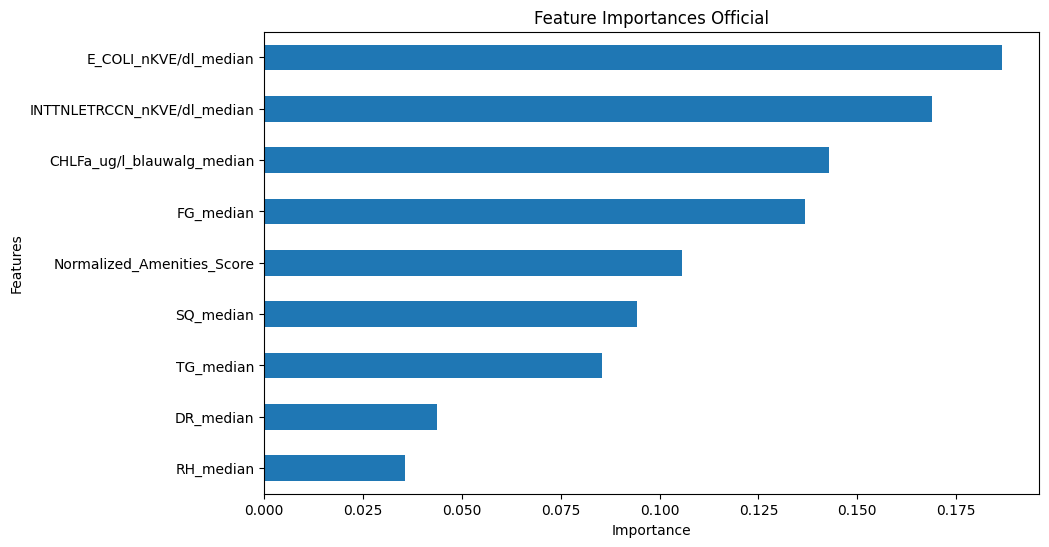

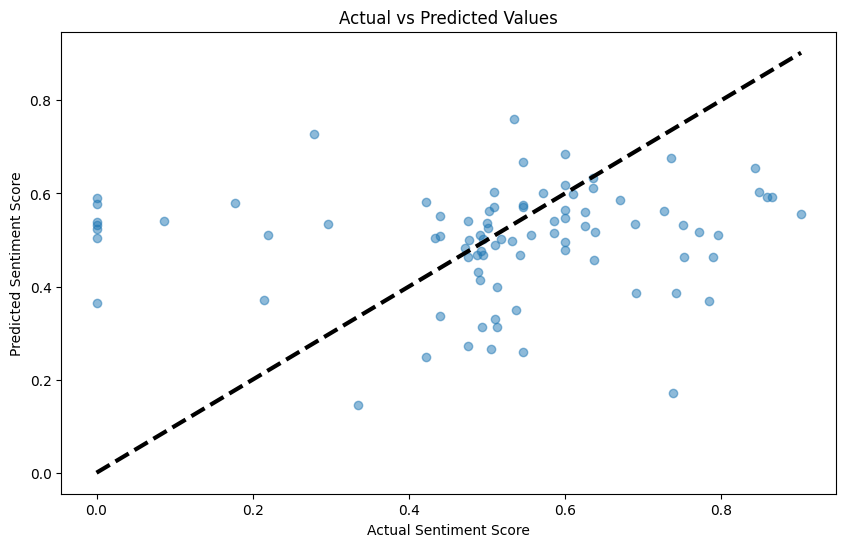

In [85]:
data = data_imputed_1

X = data.drop(['Sentiment_Score_median'], axis=1)
y = data['Sentiment_Score_median']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform K-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive values
mse_scores = -cv_scores

# Calculate mean and standard deviation of MSE
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f"Mean MSE from 5-fold CV: {mean_mse}")
print(f"Standard Deviation of MSE from 5-fold CV: {std_mse}")

# Fitting the model
rf_model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = rf_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Number of training data points: {len(X_train)}")
print(f"Number of testing data points: {len(X_test)}")

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))
feature_importances.sort_values(ascending=False).to_csv('feature_importances.csv')

# Feature importances
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances Official')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Sentiment Score')
plt.ylabel('Predicted Sentiment Score')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

Unofficial

Mean MSE from 5-fold CV: 0.047551961130917565
Standard Deviation of MSE from 5-fold CV: 0.005664884507395185
Number of training data points: 358
Number of testing data points: 90
Mean Squared Error: 0.03885879746475061
Root Mean Squared Error: 0.19712634898650816
Mean Absolute Error: 0.14319818167321183
R-squared: -0.14583066162837932
E_COLI_nKVE/dl_median          0.225730
CHLFa_ug/l_blauwalg_median     0.184406
INTTNLETRCCN_nKVE/dl_median    0.166495
SQ_median                      0.122013
FG_median                      0.096313
TG_median                      0.092116
Normalized_Amenities_Score     0.050284
DR_median                      0.031429
RH_median                      0.031215
dtype: float64


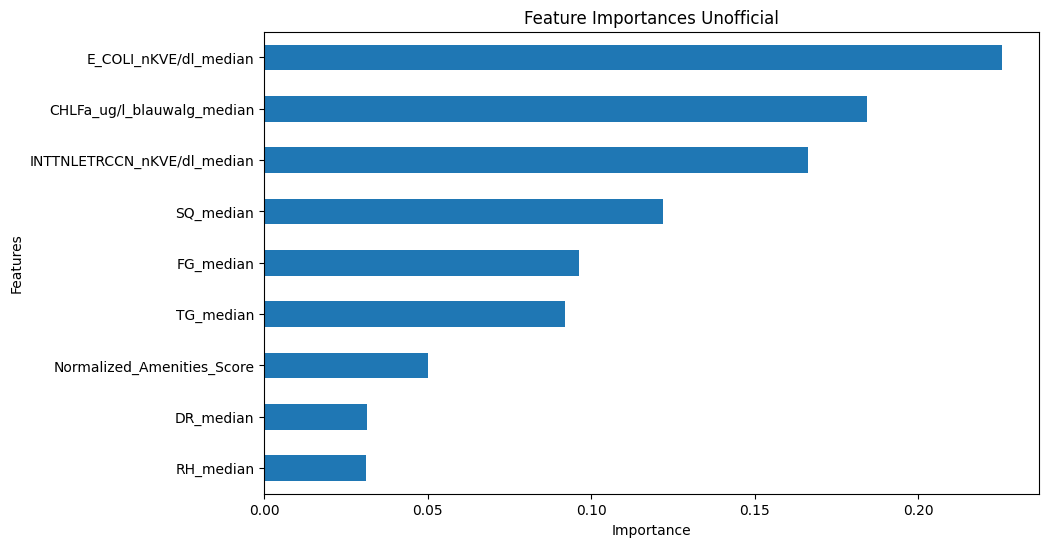

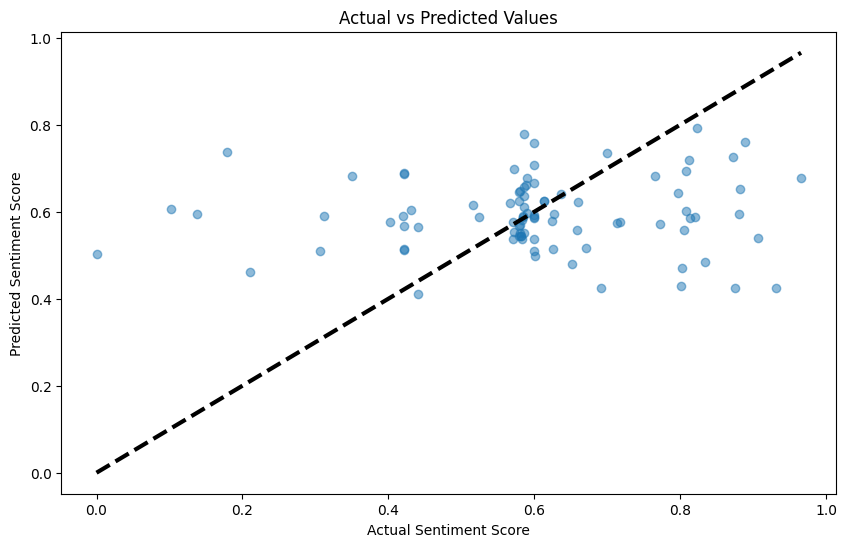

In [86]:
data = data_imputed_0

X = data.drop(['Sentiment_Score_median'], axis=1)
y = data['Sentiment_Score_median']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform K-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive values
mse_scores = -cv_scores

# Calculate mean and standard deviation of MSE
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f"Mean MSE from 5-fold CV: {mean_mse}")
print(f"Standard Deviation of MSE from 5-fold CV: {std_mse}")

# Fitting the model
rf_model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = rf_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Number of training data points: {len(X_train)}")
print(f"Number of testing data points: {len(X_test)}")

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))
feature_importances.sort_values(ascending=False).to_csv('feature_importances.csv')

# Feature importances
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances Unofficial')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Sentiment Score')
plt.ylabel('Predicted Sentiment Score')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

Official and Unofficial

Mean MSE from 5-fold CV: 0.06073430081026998
Standard Deviation of MSE from 5-fold CV: 0.011938117072911316
Number of training data points: 705
Number of testing data points: 177
Mean Squared Error: 0.06524550191207894
Root Mean Squared Error: 0.25543199077656453
Mean Absolute Error: 0.19169051035800155
R-squared: -0.1040351989537458
INTTNLETRCCN_nKVE/dl_median    0.191817
E_COLI_nKVE/dl_median          0.167111
CHLFa_ug/l_blauwalg_median     0.147622
FG_median                      0.114397
SQ_median                      0.106609
TG_median                      0.094890
Normalized_Amenities_Score     0.089267
DR_median                      0.033248
RH_median                      0.031087
Status                         0.023951
dtype: float64


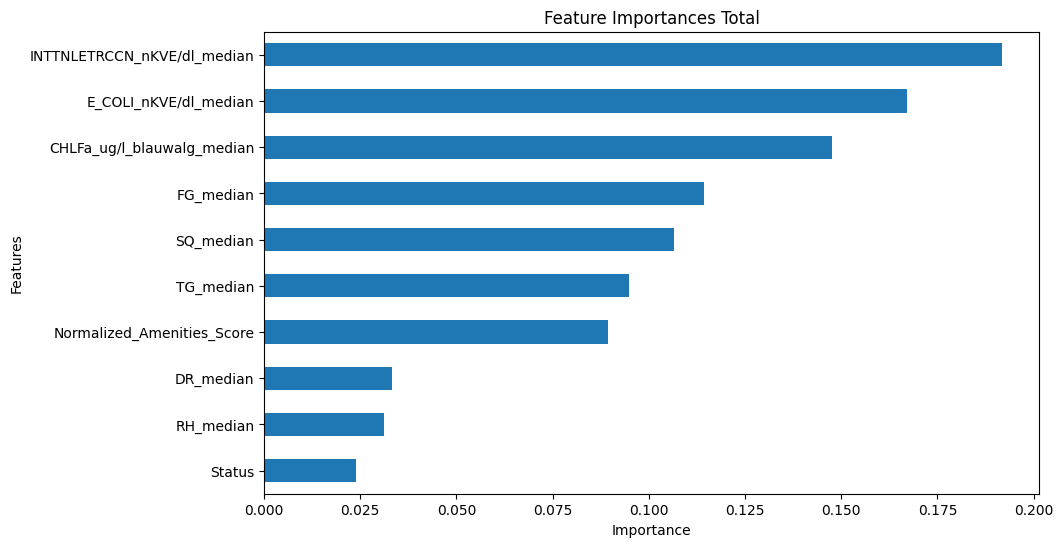

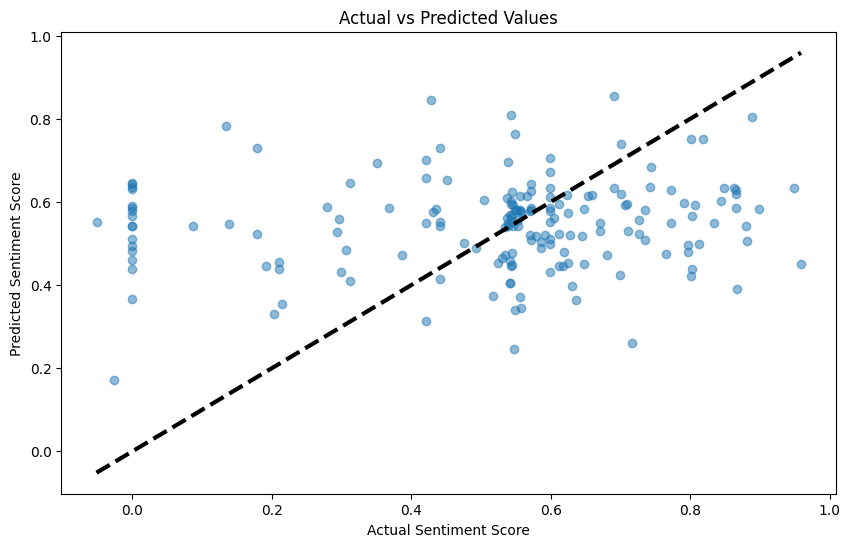

In [87]:
data = data_imputed

X = data.drop(['Sentiment_Score_median'], axis=1)
y = data['Sentiment_Score_median']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform K-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive values
mse_scores = -cv_scores

# Calculate mean and standard deviation of MSE
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f"Mean MSE from 5-fold CV: {mean_mse}")
print(f"Standard Deviation of MSE from 5-fold CV: {std_mse}")

# Fitting the model
rf_model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = rf_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Number of training data points: {len(X_train)}")
print(f"Number of testing data points: {len(X_test)}")

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))
feature_importances.sort_values(ascending=False).to_csv('feature_importances.csv')

# Feature importances
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances Total')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Sentiment Score')
plt.ylabel('Predicted Sentiment Score')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

**Merge weather and water quality data**

In [139]:
df = pd.read_csv('processed_data/water_quality/water_quality_cleaned.csv')
weather_df = pd.read_csv('processed_data/weather/weather_cleaned.csv')

'''
# Merge with Weather Data
for index, row in water_quality_df.iterrows():
    matching_weather = weather_df[weather_df['date'] == row['date']]
    if not matching_weather.empty:
        for col in weather_df.columns:
            if col != 'date':
                water_quality_df.at[index, col] = matching_weather.iloc[0][col]
'''
                
df = df[['fewsparameter', 'meetwaarde', 'locatie omschrijving', 'date']]

# Group by 'fewsparameter', 'locatie omschrijving', and 'date', then calculate the mean of 'meetwaarde'
df = df.groupby(['fewsparameter', 'locatie omschrijving', 'date']).mean().reset_index()

# Pivot the table to get unique parameters as columns
pivoted_df = df.pivot_table(index=['locatie omschrijving', 'date'], columns='fewsparameter', values='meetwaarde').reset_index()

# Optionally, to flatten the columns after pivoting
pivoted_df.columns.name = None
pivoted_df = pivoted_df.reset_index(drop=True)

merged_df = pd.merge(pivoted_df, weather_df, on='date', how='left')

# Save the merged dataframe
merged_df.to_csv('merged_data/merged_weather_water_quality.csv', index=False)

print(merged_df.columns)

/var/folders/l2/6k2cs13d16xfb7mrzcmwrcv40000gn/T/ipykernel_55009/788185899.py:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('processed_data/water_quality/water_quality_cleaned.csv')


Index(['locatie omschrijving', 'date', 'BADGT_n', 'CHLFa_ug/l_blauwalg',
       'E_COLI_nKVE/dl', 'INTTNLETRCCN_nKVE/dl', 'O2_%', 'O2_mg/l', 'T_oC',
       'ZICHT_m', 'FG', 'TG', 'SQ', 'DR', 'RH', 'PG', 'UG', 'EV24'],
      dtype='object')


In [141]:
merged_ww = pd.read_csv('merged_data/merged_weather_water_quality.csv')

columns_to_drop = ['BADGT_n', 'PG', 'UG', 'EV24']

merged_ww_cleaned = merged_ww.drop(columns=columns_to_drop)

merged_ww_cleaned.to_csv('merged_data/merged_ww_cleaned.csv', index=False)

print(merged_ww_cleaned.columns)

Index(['locatie omschrijving', 'date', 'CHLFa_ug/l_blauwalg', 'E_COLI_nKVE/dl',
       'INTTNLETRCCN_nKVE/dl', 'O2_%', 'O2_mg/l', 'T_oC', 'ZICHT_m', 'FG',
       'TG', 'SQ', 'DR', 'RH'],
      dtype='object')


In [220]:
data = pd.read_csv('merged_data/merged_ww_cleaned.csv').dropna(subset=['E_COLI_nKVE/dl'])

iterative_imputer = IterativeImputer(max_iter=10, random_state=0)

data_numeric = data.drop(columns=['locatie omschrijving', 'date'])
data_imputed = pd.DataFrame(iterative_imputer.fit_transform(data_numeric), columns=data_numeric.columns)

# Calculating the number of imputed values
total_values = data_numeric.size
total_missing = data_numeric.isna().sum().sum()
total_imputed = total_missing
percentage_imputed = (total_imputed / total_values) * 100

print(f"Percentage of imputed data for the whole dataset: {percentage_imputed:.2f}%")

# Calculate the percentage of missing values in each column
percentage_missing_by_column = data_numeric.isna().mean() * 100
sorted_percentage_missing = percentage_missing_by_column.sort_values(ascending=False)

print("Percentage of Missing (Imputed) Data by Column:")
for column, percentage in sorted_percentage_missing.items():
    print(f"{column}: {percentage:.2f}%")

print(data_imputed.columns)

data_imputed.to_csv('imputed_data/ww_imputed_data.csv', index=False)

data = data_imputed

Percentage of imputed data for the whole dataset: 21.13%
Percentage of Missing (Imputed) Data by Column:
O2_%: 64.72%
CHLFa_ug/l_blauwalg: 63.92%
O2_mg/l: 62.41%
ZICHT_m: 29.48%
T_oC: 26.60%
INTTNLETRCCN_nKVE/dl: 6.47%
E_COLI_nKVE/dl: 0.00%
FG: 0.00%
TG: 0.00%
SQ: 0.00%
DR: 0.00%
RH: 0.00%
Index(['CHLFa_ug/l_blauwalg', 'E_COLI_nKVE/dl', 'INTTNLETRCCN_nKVE/dl', 'O2_%',
       'O2_mg/l', 'T_oC', 'ZICHT_m', 'FG', 'TG', 'SQ', 'DR', 'RH'],
      dtype='object')


In [218]:
mean = data['E_COLI_nKVE/dl'].mean()
std = data['E_COLI_nKVE/dl'].std()

threshold = 3

data = data[(data['E_COLI_nKVE/dl'] >= mean - threshold * std) & (data['E_COLI_nKVE/dl'] <= mean + threshold * std)]

Using weather to predict water quality

Mean MSE from 5-fold CV: 1722257.1693818443
Standard Deviation of MSE from 5-fold CV: 795064.89271251
Number of training data points: 2818
Number of testing data points: 705
Mean Squared Error: 1131265.8488358257
Root Mean Squared Error: 1063.6098198285995
Mean Absolute Error: 596.1927447735247
R-squared: -0.1397607276722499
TG    0.237088
RH    0.215323
SQ    0.199735
FG    0.192017
DR    0.155837
dtype: float64


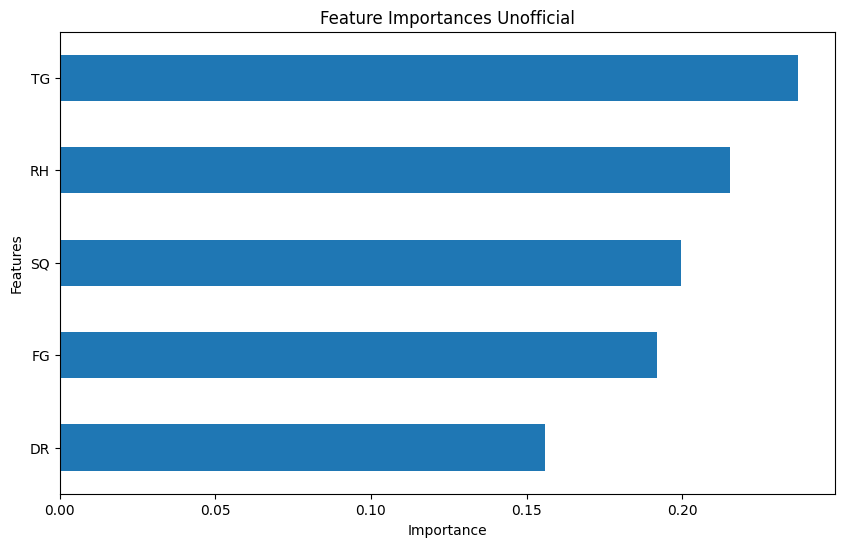

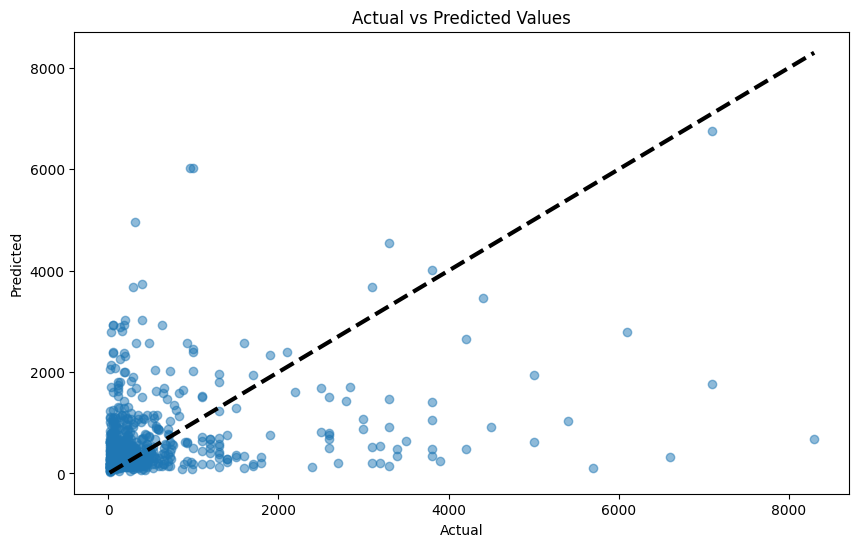

In [219]:
X = data.drop(['CHLFa_ug/l_blauwalg', 'E_COLI_nKVE/dl', 'INTTNLETRCCN_nKVE/dl', 'O2_%',
       'O2_mg/l', 'T_oC', 'ZICHT_m'], axis=1)
y = data['E_COLI_nKVE/dl']

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform K-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert scores to positive values
mse_scores = -cv_scores

# Calculate mean and standard deviation of MSE
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f"Mean MSE from 5-fold CV: {mean_mse}")
print(f"Standard Deviation of MSE from 5-fold CV: {std_mse}")

# Fitting the model
rf_model.fit(X_train, y_train)

# Making predictions and evaluating the model
predictions = rf_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Number of training data points: {len(X_train)}")
print(f"Number of testing data points: {len(X_test)}")

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# Feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))
feature_importances.sort_values(ascending=False).to_csv('feature_importances.csv')

# Feature importances
plt.figure(figsize=(10, 6))
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances Unofficial')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# Actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

Clustering with monthly data

/Users/aoyamaxx/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aoyamaxx/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aoyamaxx/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/aoyamaxx/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureW

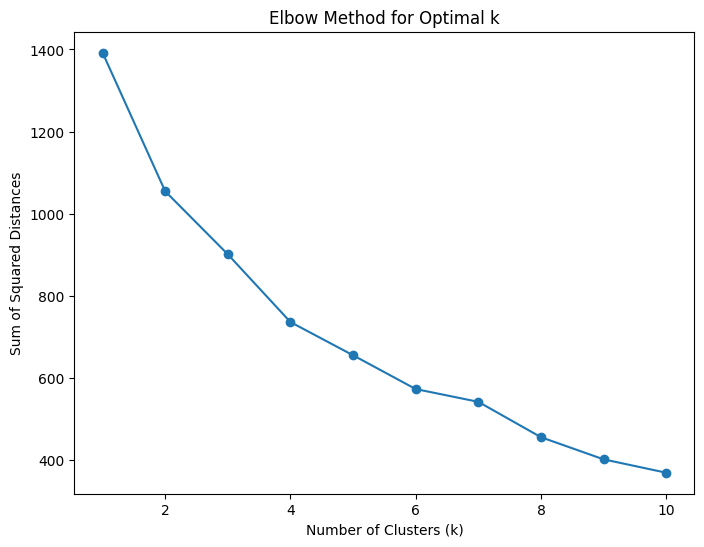

/Users/aoyamaxx/anaconda3/envs/py311/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


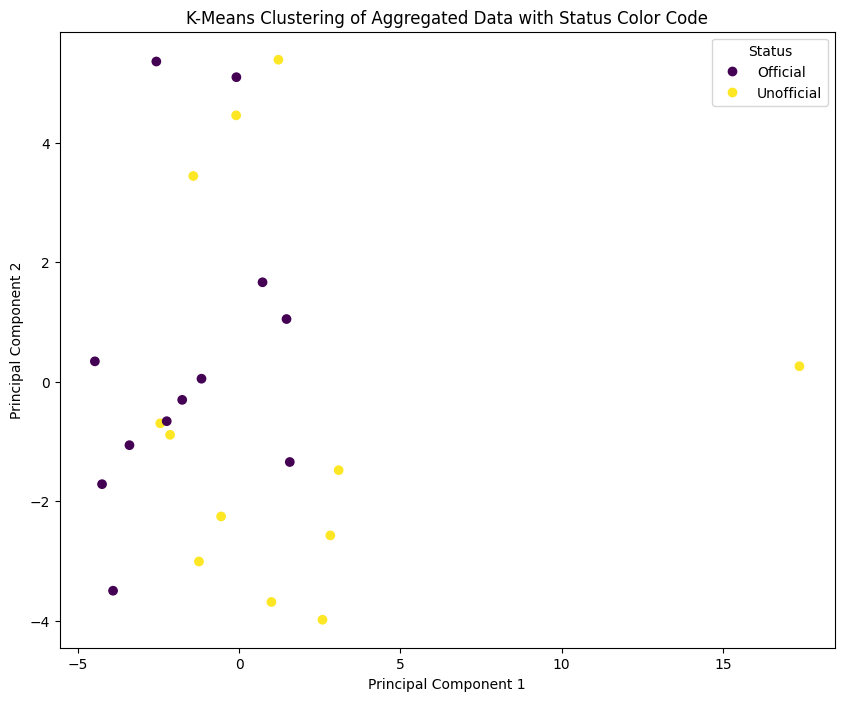

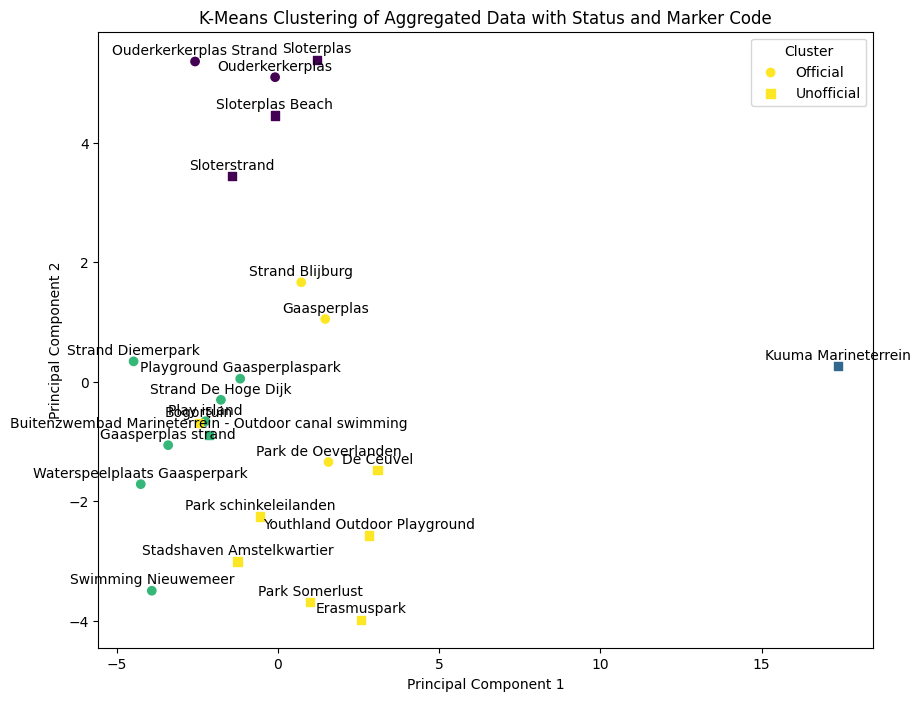

In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Load the csv
df = pd.read_csv('merged_data/merged_all_monthly.csv')

# Group by the 'name' column and aggregate the data
aggregated_df = df.groupby('name').agg({
    'Location_Unique': 'first',
    'Lat': 'first',
    'Long': 'first',
    'Status': 'first',
    'Sentiment_Score_mean': 'mean',
    'Sentiment_Score_median': 'median',
    'Sentiment_Score_std': 'std',
    'review_rating_mean': 'mean',
    'review_rating_median': 'median',
    'review_rating_std': 'std',
    'O2_mg/l_mean': 'mean',
    'O2_mg/l_median': 'median',
    'O2_mg/l_std': 'std',
    'O2_%_mean': 'mean',
    'O2_%_median': 'median',
    'O2_%_std': 'std',
    'T_oC_mean': 'mean',
    'T_oC_median': 'median',
    'T_oC_std': 'std',
    'ZICHT_m_mean': 'mean',
    'ZICHT_m_median': 'median',
    'ZICHT_m_std': 'std',
    'INTTNLETRCCN_nKVE/dl_mean': 'mean',
    'INTTNLETRCCN_nKVE/dl_median': 'median',
    'INTTNLETRCCN_nKVE/dl_std': 'std',
    'E_COLI_nKVE/dl_mean': 'mean',
    'E_COLI_nKVE/dl_median': 'median',
    'E_COLI_nKVE/dl_std': 'std',
    'BADGT_n_mean': 'mean',
    'BADGT_n_median': 'median',
    'BADGT_n_std': 'std',
    'CHLFa_ug/l_blauwalg_mean': 'mean',
    'CHLFa_ug/l_blauwalg_median': 'median',
    'CHLFa_ug/l_blauwalg_std': 'std',
    'FG_mean': 'mean',
    'FG_median': 'median',
    'FG_std': 'std',
    'TG_mean': 'mean',
    'TG_median': 'median',
    'TG_std': 'std',
    'SQ_mean': 'mean',
    'SQ_median': 'median',
    'SQ_std': 'std',
    'DR_mean': 'mean',
    'DR_median': 'median',
    'DR_std': 'std',
    'RH_mean': 'mean',
    'RH_median': 'median',
    'RH_std': 'std',
    'PG_mean': 'mean',
    'PG_median': 'median',
    'PG_std': 'std',
    'UG_mean': 'mean',
    'UG_median': 'median',
    'UG_std': 'std',
    'EV24_mean': 'mean',
    'EV24_median': 'median',
    'EV24_std': 'std',
    'Amenities_Score': 'mean',
    'Normalized_Amenities_Score': 'mean',
})

aggregated_df.reset_index(inplace=True)

# Extract numerical columns for clustering
numerical_cols = aggregated_df.select_dtypes(include=['float64', 'int64']).columns

# Exclude non-numeric columns
non_numeric_cols = ['name', 'Location_Unique', 'Status']
numerical_cols = numerical_cols.difference(non_numeric_cols)

# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
aggregated_df[numerical_cols] = imputer.fit_transform(aggregated_df[numerical_cols])

# Standardize the features
scaler = StandardScaler()
aggregated_df[numerical_cols] = scaler.fit_transform(aggregated_df[numerical_cols])

# Find the optimal number of clusters (k) using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(aggregated_df[numerical_cols])
    sse.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

# Based on the elbow method, choose the optimal k (the "elbow" in the plot)
optimal_k = 4  # Adjust this based on the elbow method plot

# Apply k-means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
aggregated_df['Cluster'] = kmeans.fit_predict(aggregated_df[numerical_cols])

# Reduce dimensionality for visualization (optional)
pca = PCA(n_components=2)
aggregated_df[['PC1', 'PC2']] = pca.fit_transform(aggregated_df[numerical_cols])

# Official and unofficial plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(aggregated_df['PC1'], aggregated_df['PC2'], c=aggregated_df['Status'].map({'official': 0, 'unofficial': 1}), cmap='viridis')
plt.title('K-Means Clustering of Aggregated Data with Status Color Code')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
legend_labels = {'official': 'Official', 'unofficial': 'Unofficial'}
handles, labels = scatter.legend_elements()
plt.legend(handles, legend_labels.values(), title='Status')
plt.show()

# Color coded cluster plot
# Create arrays for official and unofficial
official_markers = np.where(aggregated_df['Status'] == 'official', 'o', 's')
unofficial_markers = np.where(aggregated_df['Status'] == 'official', 'o', 's')

# Scatter plot the clusters with color-coded status and different markers
plt.figure(figsize=(10, 8))
scatter_official = plt.scatter(aggregated_df.loc[aggregated_df['Status'] == 'official', 'PC1'], 
                                aggregated_df.loc[aggregated_df['Status'] == 'official', 'PC2'], 
                                c=aggregated_df.loc[aggregated_df['Status'] == 'official', 'Cluster'],
                                cmap='viridis', label='Official', marker='o')
scatter_unofficial = plt.scatter(aggregated_df.loc[aggregated_df['Status'] == 'unofficial', 'PC1'], 
                                  aggregated_df.loc[aggregated_df['Status'] == 'unofficial', 'PC2'], 
                                  c=aggregated_df.loc[aggregated_df['Status'] == 'unofficial', 'Cluster'],
                                  cmap='viridis', label='Unofficial', marker='s')

# Add labels to the locations
for i, txt in enumerate(aggregated_df['name']):
    plt.annotate(txt, (aggregated_df['PC1'][i], aggregated_df['PC2'][i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.title('K-Means Clustering of Aggregated Data with Status and Marker Code')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=[scatter_official, scatter_unofficial], title='Cluster')
plt.show()